<a href="https://colab.research.google.com/github/abhi23122000/DeepLearning/blob/master/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion_Mnist Classifier Deep Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Importing Necessary Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading The Data set

In [ ]:
train = pd.read_csv('/content/drive/My Drive/iot_dl/fashion-mnist_train.csv')

In [ ]:
train.head() #displays top 5 records

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape #Return a tuple representing the dimensionality of the DataFrame.

(60000, 785)

In [ ]:
test = pd.read_csv('/content/drive/My Drive/iot_dl/fashion-mnist_test.csv')

In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.shape

(10000, 785)

In [ ]:
# Put labels into Y_train variable
Y_train = train['label'].values
# drop label column
X_train = train.drop(labels = ["label"], axis = 1)
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
# put labels into Y_test variable
Y_test = test["label"].values
# Drop 'label' column
X_test = test.drop(labels = ["label"], axis = 1)
X_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,44,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,235,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,2,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,184,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


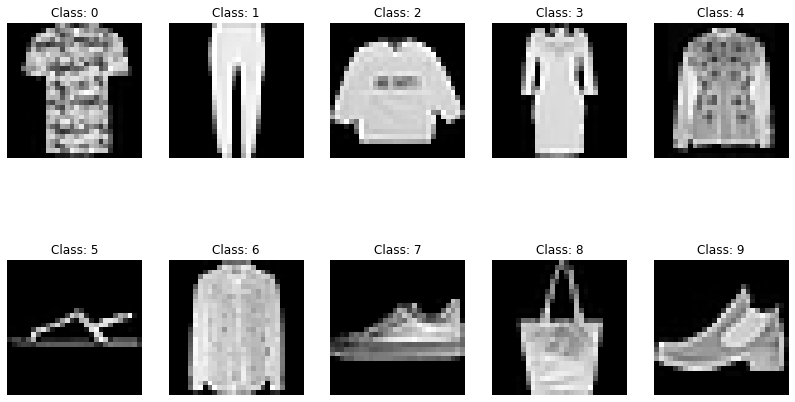

In [ ]:
# Displayig some sample classes
plt.figure(figsize = (14,8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    img = train[train.label == i].iloc[0, 1:].values
    img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + str(i))
    plt.axis('off')
    
plt.show()

## Normalization

* Done in order to scale down every data points to same range

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 784)
X_test shape:  (10000, 784)


## Reshaping

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


# Implementing CNN model with keras tuner

* Keras tuner helps in selecting correct parameters for selection of convolution layers,Number of filters,Filter/kernel size.
* Rather than randomly providing these parameters we can tune our model with correct number of parameters further increasing our accuracy.

##### Here is the link to official keras tuner documentation- https://keras-team.github.io/keras-tuner/

* First, we define a model-building function. It takes an argument hp from which you can sample hyperparameters, such as hp.Int('units', min_value=32, max_value=256, step=32) (an integer from a certain range).

* This function returns a compiled model.
* Next, instantiate a tuner. You should specify the model-building function, the name of the objective to optimize (whether to minimize or maximize is automatically inferred for built-in metrics), the total number of trials (max_trials) to test, and the number of models that should be built and fit for each trial (executions_per_trial).

* Available tuners are RandomSearch and Hyperband.

* Note: the purpose of having multiple executions per trial is to reduce results variance and therefore be able to more accurately assess the performance of a model. If you want to get results faster, you could set executions_per_trial=1 (single round of training for each model configuration).

In [ ]:
def build_model(hp):
    
    model_tune = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=256, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    
        
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
    model_tune.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
    return model_tune

In [ ]:
!pip install keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='project',project_name="Mnist Fashion")

In [ ]:
tuner_search.search(X_train,Y_train,epochs=3,validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4660 - accuracy: 0.8319 - val_loss: 0.3296 - val_accuracy: 0.8838
Epoch 2/3
1688/1688 [==============================] - 13s 7ms/step - loss: 0.3048 - accuracy: 0.8889 - val_loss: 0.2874 - val_accuracy: 0.8993
Epoch 3/3
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2627 - accuracy: 0.9035 - val_loss: 0.2855 - val_accuracy: 0.9003


Epoch 1/3
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4522 - accuracy: 0.8357 - val_loss: 0.3278 - val_accuracy: 0.8860
Epoch 2/3
1688/1688 [==============================] - 11s 6ms/step - loss: 0.2955 - accuracy: 0.8902 - val_loss: 0.2852 - val_accuracy: 0.8982
Epoch 3/3
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2440 - accuracy: 0.9091 - val_loss: 0.2702 - val_accuracy: 0.9035


Epoch 1/3
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4291 - accuracy: 0.8432 - val_loss: 0.3121 - val_accuracy: 0.8872
Epoch 2/3
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2719 - accuracy: 0.8995 - val_loss: 0.2803 - val_accuracy: 0.8985
Epoch 3/3
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2166 - accuracy: 0.9185 - val_loss: 0.2509 - val_accuracy: 0.9110


Epoch 1/3
1688/1688 [==============================] - 12s 7ms/step - loss: 1.0621 - accuracy: 0.7810 - val_loss: 0.5163 - val_accuracy: 0.8093
Epoch 2/3
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4458 - accuracy: 0.8348 - val_loss: 0.4271 - val_accuracy: 0.8402
Epoch 3/3
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4264 - accuracy: 0.8395 - val_loss: 0.4476 - val_accuracy: 0.8222


Epoch 1/3
1688/1688 [==============================] - 11s 7ms/step - loss: 0.3948 - accuracy: 0.8566 - val_loss: 0.2889 - val_accuracy: 0.8965
Epoch 2/3
1688/1688 [==============================] - 11s 7ms/step - loss: 0.2466 - accuracy: 0.9109 - val_loss: 0.2347 - val_accuracy: 0.9152
Epoch 3/3
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1856 - accuracy: 0.9317 - val_loss: 0.2380 - val_accuracy: 0.9165


INFO:tensorflow:Oracle triggered exit


In [ ]:
model_tune = tuner_search.get_best_models(num_models=1)[0] #choosing the best hyperparameter out of 5 trials

In [ ]:
model_tune.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 224)       2240      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 80)        161360    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        46144     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1982528   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 2,192,922
Trainable params: 2,192,922
Non-trainable params: 0
______________________________________________

In [ ]:
history = model_tune.fit(X_train, Y_train, epochs=10, validation_split=0.1, initial_epoch=3) #as we have already trained our model for 3 epochs so our epochs count will start form 4

Epoch 4/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1359 - accuracy: 0.9494 - val_loss: 0.2491 - val_accuracy: 0.9162
Epoch 5/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0983 - accuracy: 0.9640 - val_loss: 0.2764 - val_accuracy: 0.9157
Epoch 6/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0681 - accuracy: 0.9752 - val_loss: 0.3245 - val_accuracy: 0.9105
Epoch 7/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0489 - accuracy: 0.9824 - val_loss: 0.3929 - val_accuracy: 0.9188
Epoch 8/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0380 - accuracy: 0.9859 - val_loss: 0.4631 - val_accuracy: 0.9142
Epoch 9/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0328 - accuracy: 0.9883 - val_loss: 0.4911 - val_accuracy: 0.9153
Epoch 10/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0248 - accuracy: 0.9914 - val_loss: 0.5477 - val_a

In [36]:
print('Train accuracy of the model: ',history.history['accuracy'][-1])


Train accuracy of the model:  0.99144446849823


In [37]:
print('Train loss of the model: ',history.history['loss'][-1])

Train loss of the model:  0.024843839928507805


In [39]:
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])

Validation accuracy of the model:  0.9128333330154419


In [40]:
print('Validation loss of the model: ',history.history['val_loss'][-1])

Validation loss of the model:  0.5476641058921814


In [42]:
score = model_tune.evaluate(X_test,Y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.5731871128082275
Test Accuracy: 0.9110000133514404
